# Statistik-Projekt

## Authorin: Miriam Mesghenna

## 1. Case Study "Techno GmbH"

Die Techno GmbH will sich in schwierigen Zeiten zukunftsorientiert aufstellen. Dazu braucht sie genaueres Wissen über einige potentielle Veränderungsmöglichkeiten, die im Unternehmen umgesetzt werden sollen.
Die folgenden Daten stellt Ihnen das Unternehmen zur Verfügung und erwartet aussagekräftige Antworten:<br>

1_Lieferantenbeurteilung.xlsx<br>
2_Energieverbrauch.xslx<br>
3_Standzeit.xlsx<br>
4_Prozessvereinfachung.xlsx<br>

Untersuchen Sie das vorliegende Material und beantworten Sie dem
Unternehmen einige Fragen.

## 2. Erste Einstellungen: Pakete-Import, Abbildungen, Working Directory, Datensatz-Import 

**Pakete-Import**

In [1]:
suppressPackageStartupMessages(library(Rcmdr))
suppressPackageStartupMessages(library(outliers))
suppressPackageStartupMessages(library(readxl))
suppressPackageStartupMessages(library(dplyr))
suppressPackageStartupMessages(library(tidyr))
suppressPackageStartupMessages(library(RcmdrMisc))
suppressPackageStartupMessages(library(ggplot2))
suppressPackageStartupMessages(library(rstatix))
suppressPackageStartupMessages(library(PMCMRplus))
suppressPackageStartupMessages(library(vegan))
library("IRdisplay")

**Abbildungen**

In [2]:
Gruppierte_Barchart<- "Grouped_Bar_Chart.png"
Hypothesen_2<- "Hypothesen_Wilcoxon_Test.png"
QQ_Plot <- "QQ-Plot.png"
boxplot <- "boxplot.png"
Grubbs_Hypothesen <- "Grubbs_Hypothesen.png"
Dauer_Feuchte<-"Dauer_Feuchte.png"
Dauer_Temperatur <-("Dauer_Temperatur.png")
Feuchte_Temperatur<-("Feuchte_Temperatur.png")

**Default Working Directory festlegen**

In [3]:
setwd("C:/Users/mesgh/OneDrive/Documenti/Statistik/Datensätze")

**Datensatz-Import**

In [4]:
Dataset_Lieferantenbeurteilung <- read_excel("1_Lieferantenbeurteilung - Copy.xlsx")
Dataset_Energieverbrauch<- read_excel("2_Energieverbrauch.xlsx")
Dataset_Standzeit <- read_excel("3_Standzeit.xlsx")
Dataset_Prozessvereinfachung <- read_excel("4_Prozessvereinfachung.xlsx")
Dataset_Prozessvereinfachung_2 <- read_excel("4_Prozessvereinfachung_Copy.xlsx")

## 3. "Lieferantenbeurteilung"

Im Rahmen der Lieferantenreduzierung sollen drei Lieferanten, die verschiedene technische Bauteile und Hilfsmittel liefern, auf Zuverlässigkeit ihrer gelieferten Artikel untersucht werden.

**a. Unterscheidet sich die Produktzuverlässigkeit der einzelnen Lieferanten signifikant voneinander?**

### Deskriptive Statistik 

**Gruppierte Barchart**

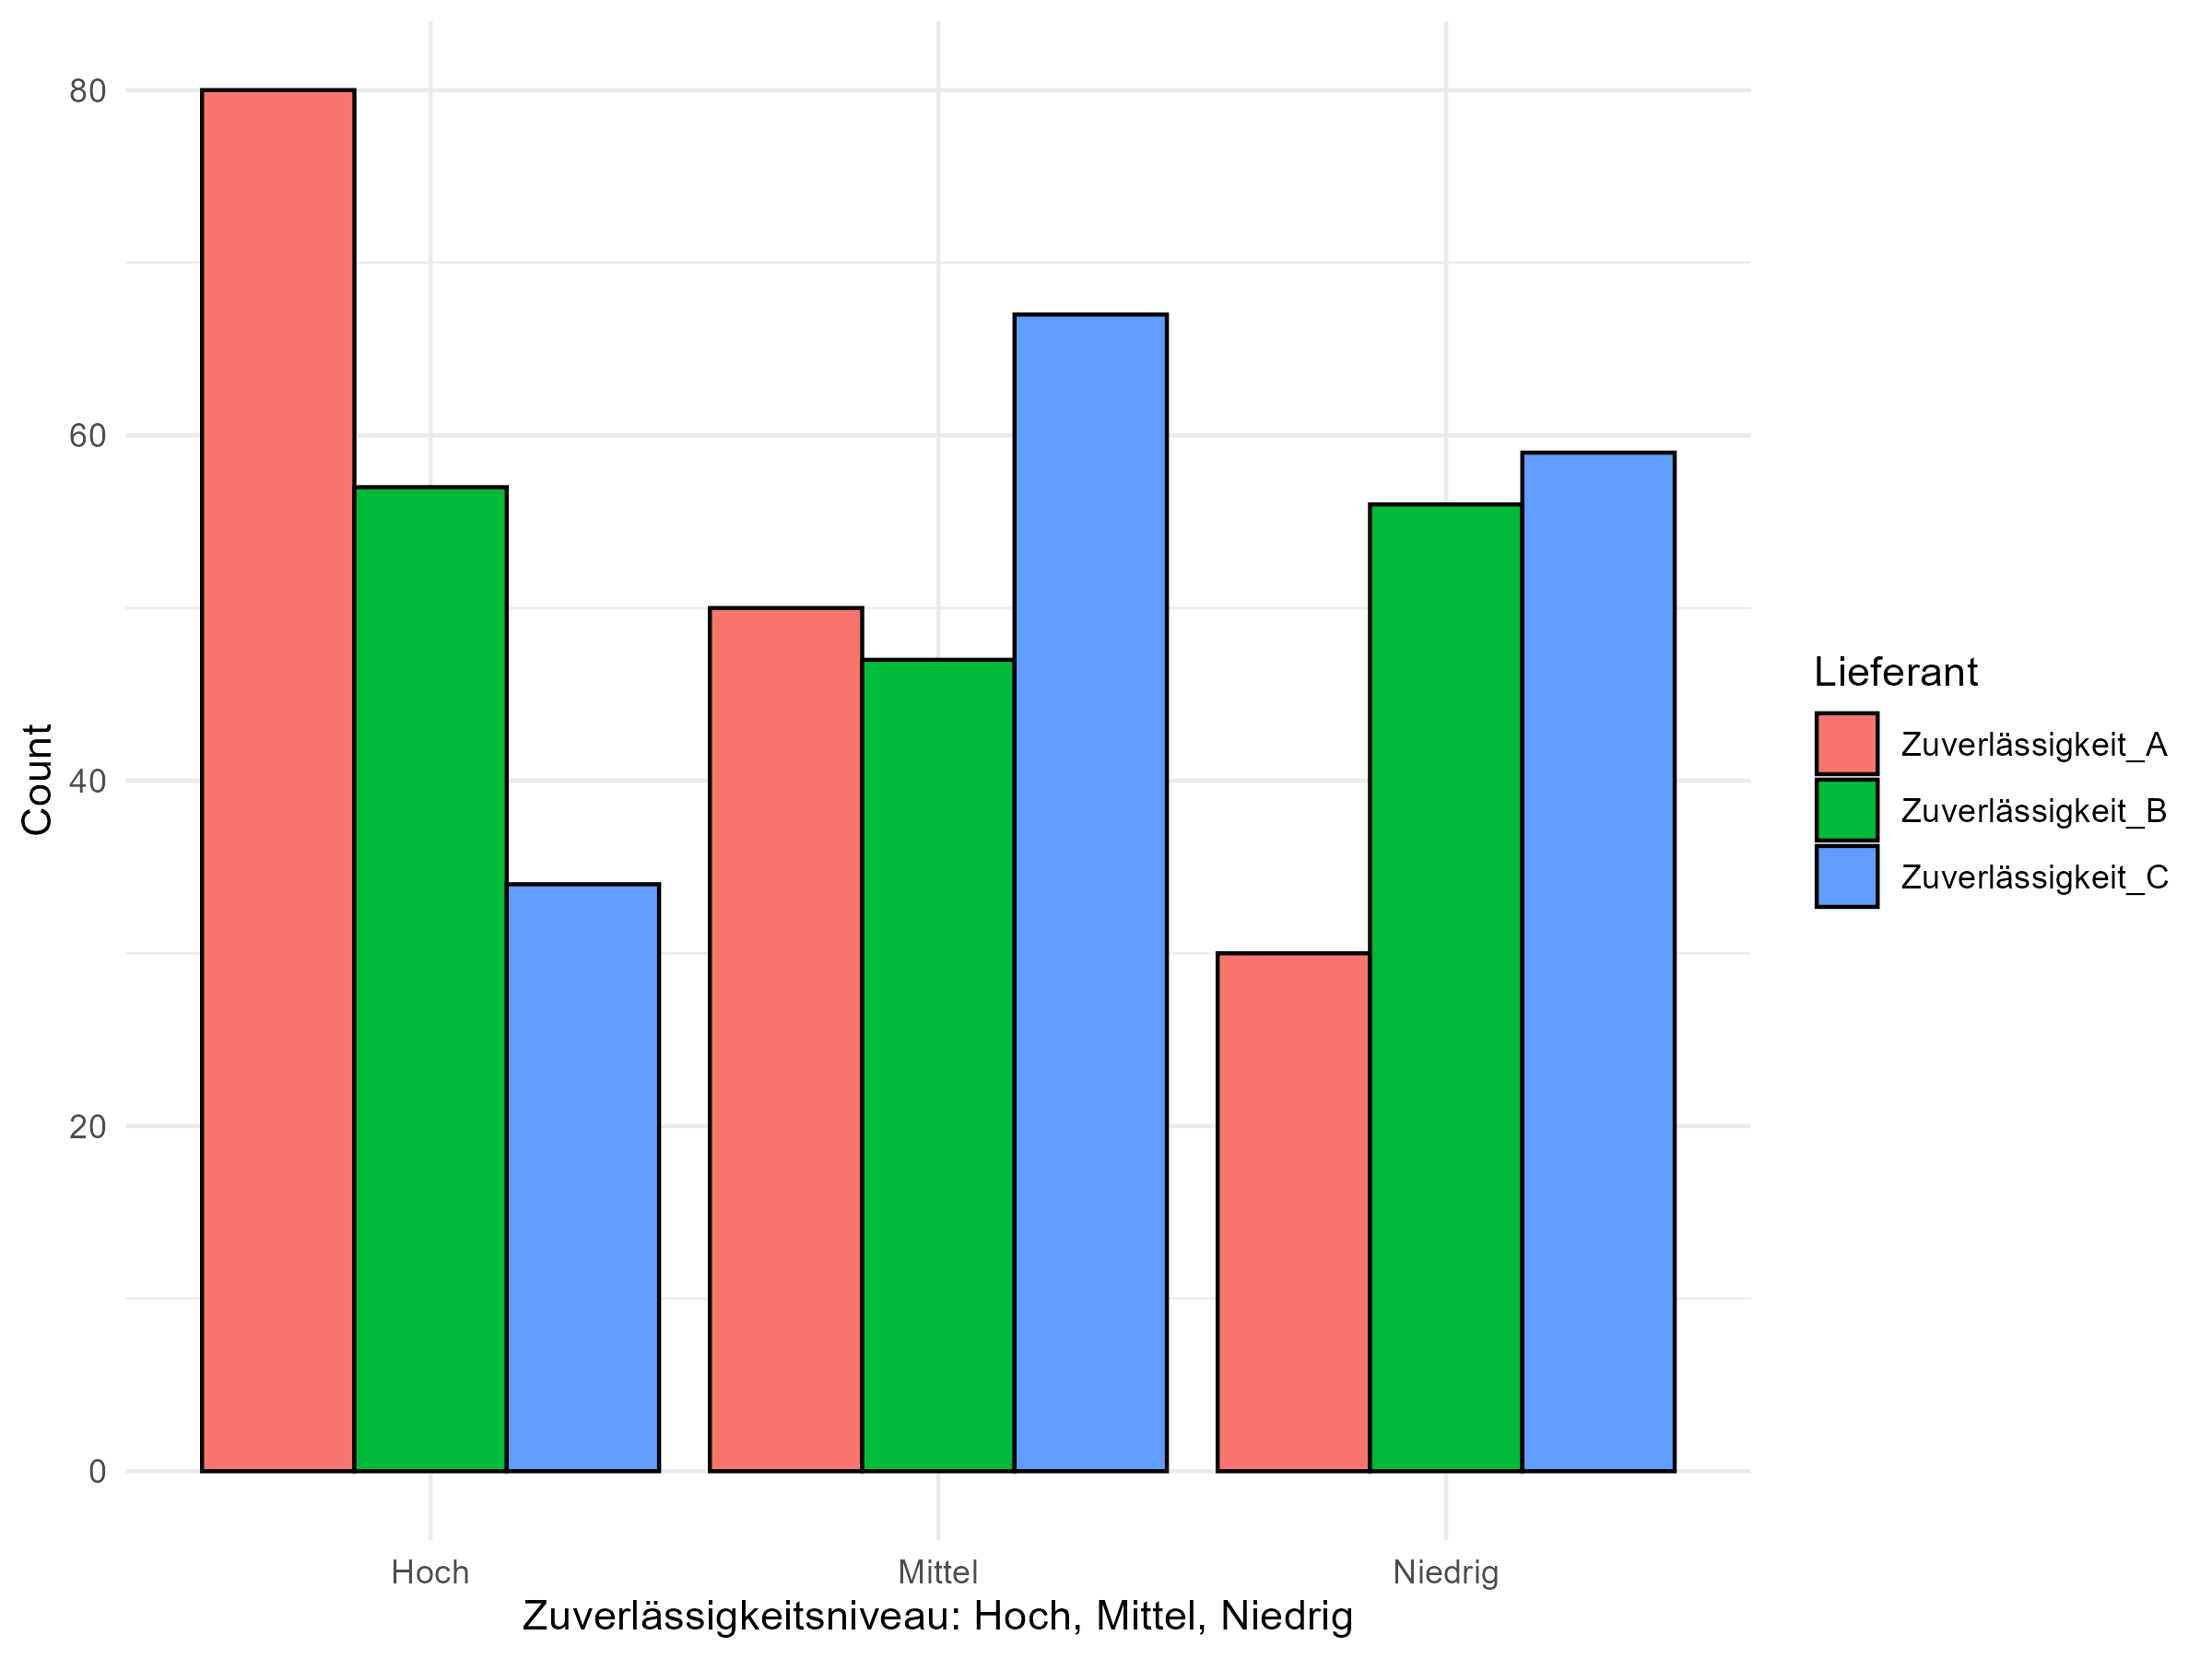

In [5]:
display_png(file = Gruppierte_Barchart) 

*Auf den ersten Blick sehen wir, dass die drei Lieferanten unterschiedliche Zuverlässigkeitsniveaus haben. Lieferant A (Rot) hat die höchste Anzahl an Bewertungen im Zuverlässigkeitsniveau "Hoch" und die niedrigste Anzahl an Bewertungen im Niveau "Niedrig", was positiv ist.*

*Lieferant C (Blau) hat die geringste Anzahl an Bewertungen im Zuverlässigkeitsniveau "Hoch" und eine ähnliche Anzahl an Bewertungen für "Mittel" und "Niedrig". Daher ist die Leistung von Lieferant C nicht besonders gut.*

*Die Leistung von Lieferant B ist unauffällig: Die drei Niveaus sind ähnlich verteilt.*

### Unabhängigkeitstest

**Hypothesen**

H0: Die Lieferanten arbeiten mit gleichem Zuverlässigkeitsniveau<br>
H1: Die Lieferanten arbeiten mit unterschiedlichem Zuverlässigkeitsniveau

**Kreuztabelle**

In [6]:
.Table<-xtabs(~Lieferant+Zuverlässigkeit, data=Dataset_Lieferantenbeurteilung)
cat("\nFrequency table:\n")
print(.Table)


Frequency table:
             Zuverlässigkeit
Lieferant     Hoch Mittel Niedrig
  Lieferant A   80     50      30
  Lieferant B   70     60      70
  Lieferant C   40     80      79


**Unabhängigkeitstest**

In [7]:
.Test <- chisq.test(.Table,correct =FALSE)
.Test


	Pearson's Chi-squared test

data:  .Table
X-squared = 39.987, df = 4, p-value = 4.355e-08


p-Wert < 0.05 --> wir können die Nullhypothese ablehnen, die Lieferanten arbeiten mit unterschiedlichem Zuverlässigkeitsniveau

**a. Unterscheidet sich die Produktzuverlässigkeit der einzelnen Lieferanten signifikant voneinander?**
*Antwort: wir können davon ausgehen, dass die Lieferanten mit unterschiedlichem Zuverlässigkeitsniveau arbeiten.*

**b. Gibt es einen Zusammenhang zwischen Produktkategorie und Zuverlässigkeit?**

H0: es gibt keinen Zusammenhang zwischen Produktkategorie und Zuverlässigkeit<br>
H1: es gibt einen Zusammenhang zwischen Produktkategorie und Zuverlässigkeit

In [8]:
.Table<-xtabs(~Produktgruppe+Zuverlässigkeit, data=Dataset_Lieferantenbeurteilung)
cat("\nFrequency table:\n")
print(.Table)


Frequency table:
             Zuverlässigkeit
Produktgruppe Hoch Mittel Niedrig
  Elektronik    76     56      60
  Hilfsstoffe   35     40      34
  Mechanik      55     74      56
  Werkzeuge     24     20      29


**Unabhängigkeitstest**

In [9]:
.Test <- chisq.test(.Table,correct =FALSE)
.Test


	Pearson's Chi-squared test

data:  .Table
X-squared = 8.9333, df = 6, p-value = 0.1774


p-Wert > 0.05 --> wir können die Nullhypothese nicht ablehnen --> es gibt keinen signifikanten Zusammenhang zwischen Produktkategorie und Zuverlässigkeit

**b. Gibt es einen Zusammenhang zwischen Produktkategorie und Zuverlässigkeit?**

*Antwort: wir können davon ausgehen, dass es keinen signifikanten Zusammenhang zwischen Produktkategorie und Zuverlässigkeit gibt*

## 4. "Energieverbrauch"

Eine Veränderung von Produktionsmitteln soll zu einer Absenkung des Energieverbrauchs führen. <br>
Im Unternehmen gibt es gewisse Vorbehalte gegen den Einsatz von nicht-parametrischen Verfahren. <br>
Überprüfen Sie die Veränderung, wenn möglich, mit einem parametrischen Verfahren. Ein nicht-parametrisches Verfahren ist erst nachfolgend einsetzbar!

*Das Unternehmen hat uns keinen Hinweis zur Abhängigheit zwischen den zwei Stichproben, daher gehen wir von Unabhängigkeit aus. Ich überprüfe das mit einer Korrelationsmatrix:*

In [10]:
correlation_matrix <- cor(Dataset_Energieverbrauch)

print(correlation_matrix)

            Herkömmlich   Neuartig
Herkömmlich   1.0000000 -0.1455661
Neuartig     -0.1455661  1.0000000


*Es kann bestätigt werden, dass es keine Korrelation zwischen den zwei Stichproben gibt.*

*Das Unternehmen bevorzugt parametrische Tests. Kann ich für diese Stichproben einen parametrischen Test anwenden?*

**Voraussetzungen für den t-Test für zwei unabhängige Stichproben**<br>
1. Mindestens intervallskaliert<br>
2. Keine potentiellen Ausreißer<br>
3. Normalverteilung beider Stichproben (bzw. ni ≥ 30)<br>
4. Keine signifikanten Streuungsunterschiede

**1. Mindestens intervallskaliert**<br>
Die Daten sind intervallskaliert --> Voraussetzung erfüllt

**2. Keine potentiellen Ausreißer**

Deskriptive Statistik 

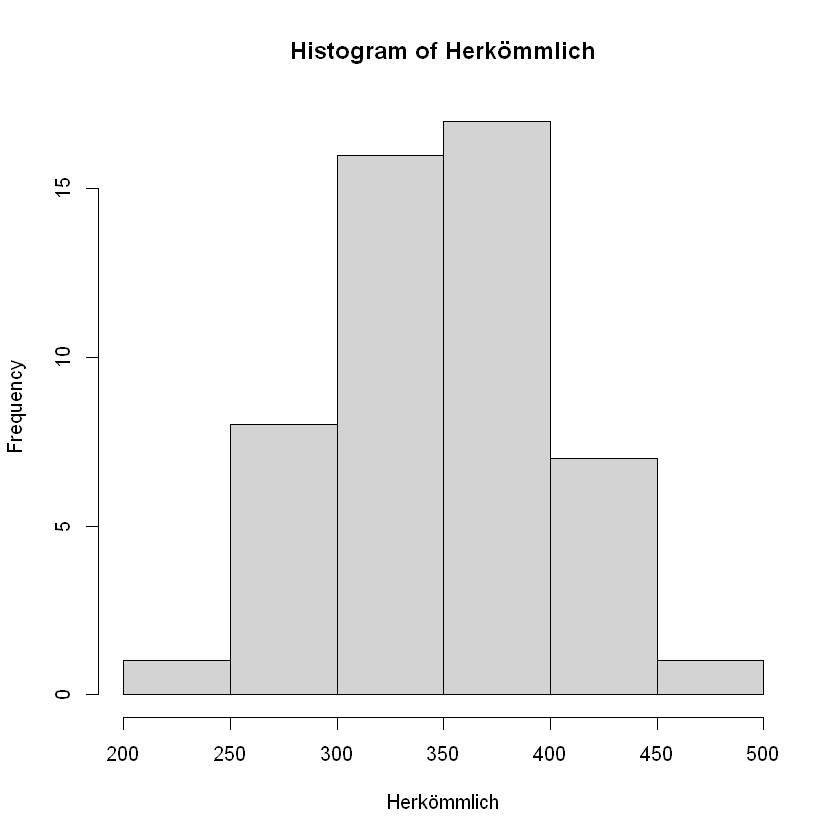

In [11]:
with(Dataset_Energieverbrauch, hist(`Herkömmlich`))

[1] 25  2

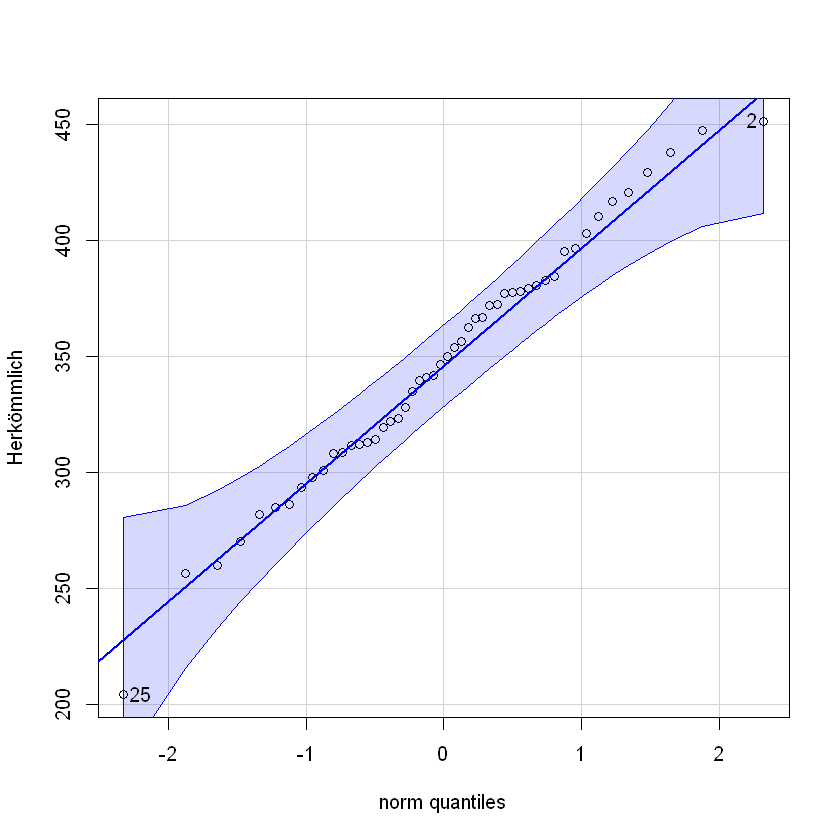

In [12]:
with(Dataset_Energieverbrauch, qqPlot(`Herkömmlich`))

*Das Histogramm und das QQ-Plot der Stichprobe "Herkömmlich" geben kein Zeichen von extremen Ausreißern*

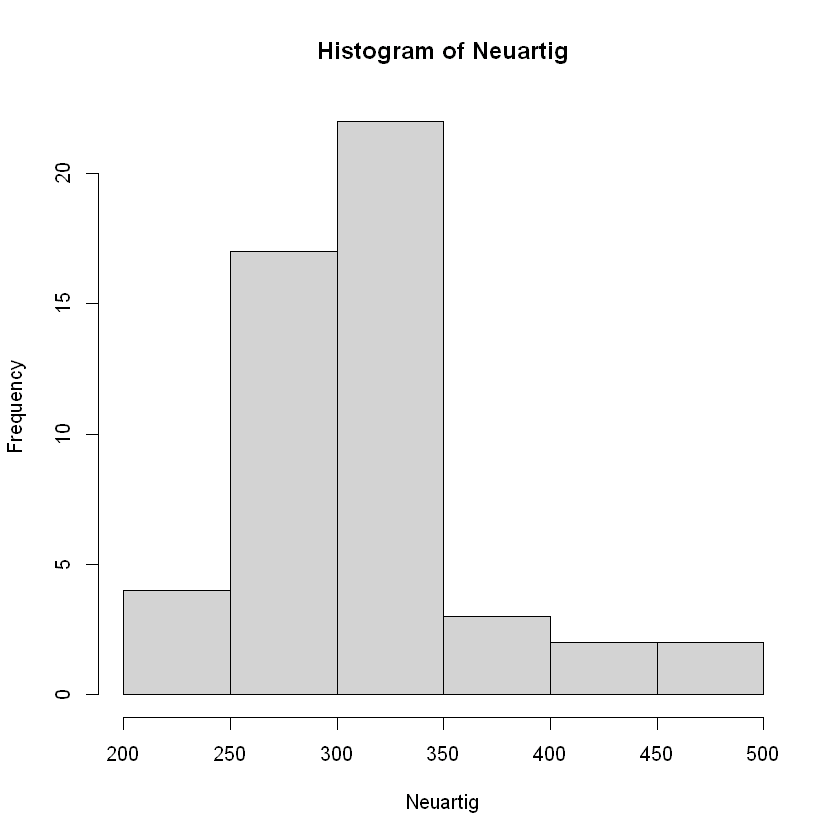

In [13]:
with(Dataset_Energieverbrauch, hist(`Neuartig`))

[1] 50 22

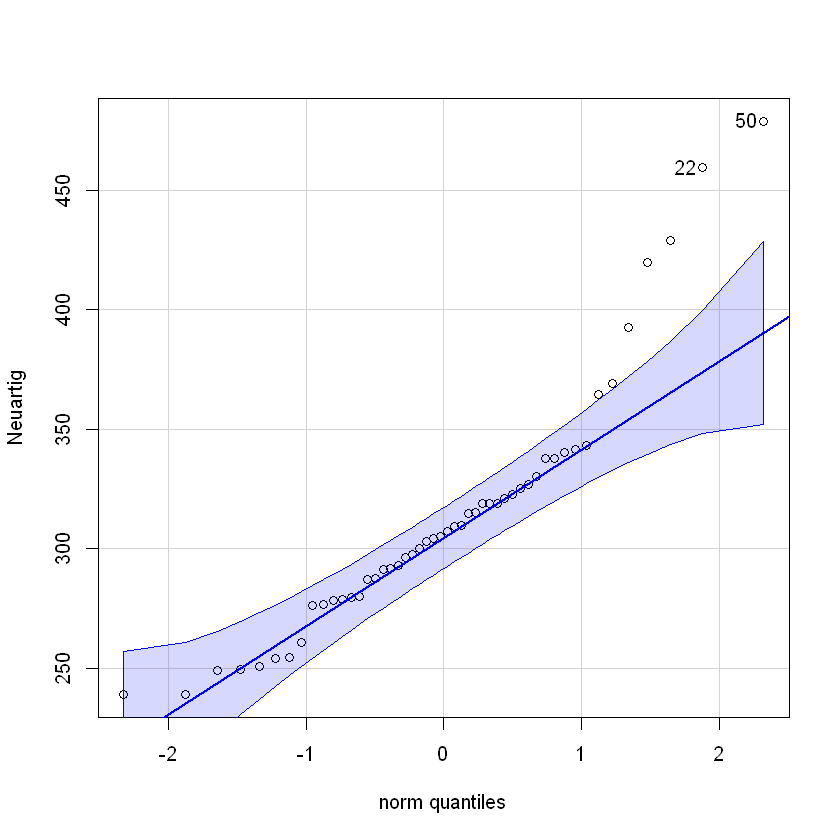

In [14]:
with(Dataset_Energieverbrauch, qqPlot(`Neuartig`))

Das Histogramm der Stichprobe "Neuartig" zeigt eine Schiefe, und das QQ-Plot für die Stichprobe "Neuartig" deutet auf verschiedene potenzielle extremen Ausreißer hin

**Grubbs' Ausreißertest** 

Hypothesen<br>

$H_0$: Der Datensatz enthält keine Ausreißer<br>
$H_1$: Es gibt mindestens einen Ausreißer im Datensatz

Grubb's Ausreißertest für Stichprobe "Herkömmlich":

In [15]:
grubbs_herkömmlich <- grubbs.test(x=Dataset_Energieverbrauch$Herkömmlich, type = 10, opposite = FALSE, two.sided = FALSE)
print(grubbs_herkömmlich)


	Grubbs test for one outlier

data:  Dataset_Energieverbrauch$Herkömmlich
G = 2.67975, U = 0.85046, p-value = 0.1384
alternative hypothesis: lowest value 204.22 is an outlier



Für die Stichprobe "Herkömmlich" bleiben wir in der Nullhypothese: wir gehen davon aus, dass die Stichprobe keine Ausreißer enthält

Grubb's Ausreißertest für Stichprobe "Neuartig":

In [16]:
grubbs_neuartig <- grubbs.test(x=Dataset_Energieverbrauch$Neuartig, type = 10, opposite = FALSE, two.sided = FALSE)
print(grubbs_neuartig)


	Grubbs test for one outlier

data:  Dataset_Energieverbrauch$Neuartig
G = 3.15958, U = 0.79211, p-value = 0.0219
alternative hypothesis: highest value 478.73 is an outlier



*Für die Stichprobe "Neuartig" können wir die Nullhypothese ablehnen: wir können davon ausgehen, dass die Stichprobe "Neuartig" mindestens einen Ausreißer enthält*

**3. Normalverteilung beider Stichproben (bzw. ni ≥ 30)**

Die Stichproben sind beide größer als 30 Statistikeinheiten, aber laut des Histogramms der Stichprobe "Neuartig" sind die Daten nicht normal verteilt. Wir untersuchen die Normalität für beide Stichproben noch einmal, u.z. mit dem Shapiro-Test:

In [17]:
shapiro_test_Herkömmlich <- shapiro.test(Dataset_Energieverbrauch$`Herkömmlich`)
print(shapiro_test_Herkömmlich)


	Shapiro-Wilk normality test

data:  Dataset_Energieverbrauch$Herkömmlich
W = 0.98862, p-value = 0.9087



p-Wert >0.05 --> wir können die Nullhypothese nicht ablehnen --> Die Daten der Stichprobe "Herkömmlich" haben eine Normalverteilung.

In [18]:
shapiro_test_Neuartig <- shapiro.test(Dataset_Energieverbrauch$`Neuartig`)
print(shapiro_test_Neuartig)


	Shapiro-Wilk normality test

data:  Dataset_Energieverbrauch$Neuartig
W = 0.8955, p-value = 0.0003423



Histogramm, QQ-Plot sowie Shapiro-Test für die Daten "Neuartig" deuten auf eine nicht normale Verteilung

*Da Voraussetzung 2 und 3 schon nicht erfüllt sind, werde ich die Voraussetzung 4 ("Keine signifikanten Streuungsunterschiede") nicht mehr überprüfen: ich könnte schon sagen, dass ich keinen parametrischen Test anwenden kann. Jedoch kann man noch überprüfen, ob die Daten der Stichprobe "Neuartig" transformierbar sind:*

**Symmetry Boxplot**

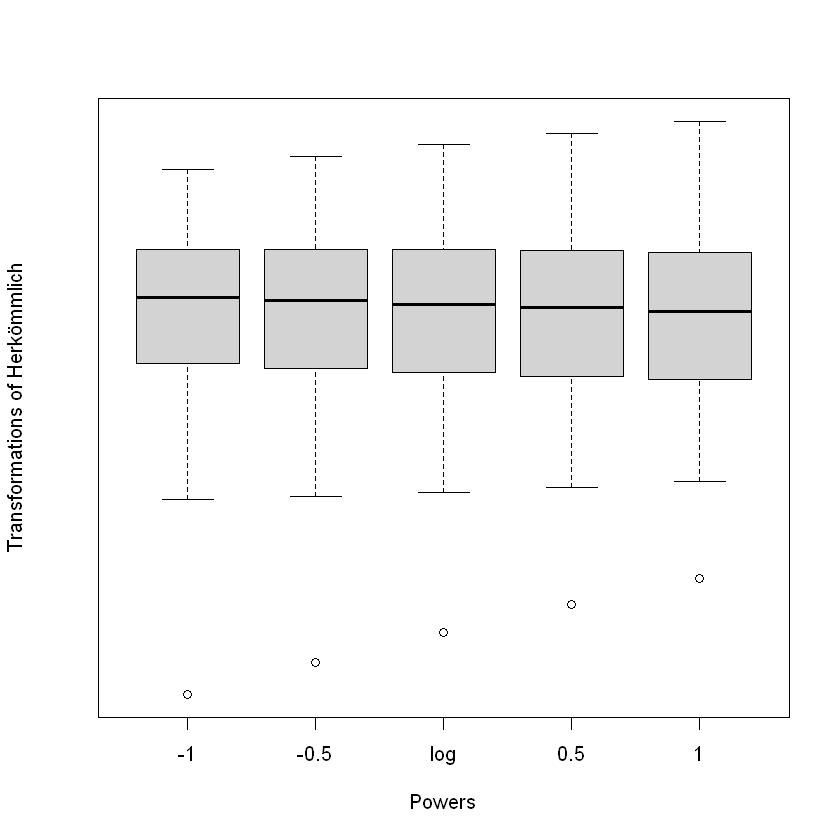

In [19]:
symbox(~Herkömmlich, data=Dataset_Energieverbrauch, trans=bcPower, powers=c(-1, -0.5, 0, 0.5,1))

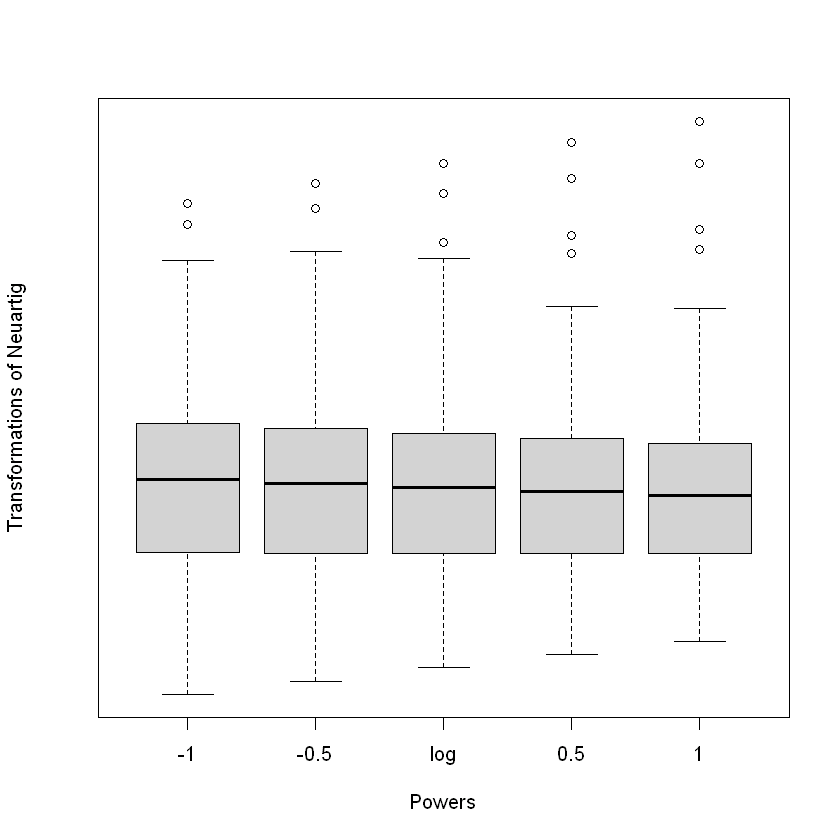

In [20]:
symbox(~Neuartig, data=Dataset_Energieverbrauch, trans=bcPower, powers=c(-1, -0.5, 0, 0.5,1))

*Symmetrie-Boxplots helfen dabei, den Effekt verschiedener Potenztransformationen auf die Symmetrie eines Datensatzes zu beurteilen. Wenn nach dem Ausprobieren einer Reihe von Potenztransformationen (einschließlich der logarithmischen Transformation) keiner der resultierenden Boxplots eine klare symmetrische Form aufweist (d. h., der Median ist zentriert, die Whisker sind ungefähr gleich lang und die Streuung potenzieller Ausreißer ist ausgeglichen), deutet dies darauf hin, dass eine einfache Potenztransformation möglicherweise nicht die geeignete Methode ist, um für diese Daten Symmetrie zu erreichen.*

*Wir können daher bestätigen, dass ein parametrisches Testverfahren nicht zulässig ist.*

**Nonparametrischer Test: Wilcoxon-Test für zwei unabhängige Stichproben**

**Hypothesen**

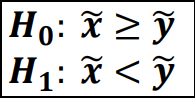

In [21]:
display_png(file = Hypothesen_2) 

$H_0$: Die Zentralmaß der Stichgruppe "Neuartig" ist größer oder gleich wie die Zentralmaß der Gruppe "Herkömmlich" --> Der Energieverbrauch der Stichprobe "Neuartig" ist höher oder gleich wie der Energieverbrauch der Stichprobe "Herkömmlich"

$H_1$: Die Zentralmaß der Stichgruppe "Neuartig" ist kleiner als die Zentralmaß der Gruppe "Herkömmlich" --> Der Energieverbrauch der Stichprobe "Neuartig" ist niedriger als der Energieverbrauch der Stichprobe "Herkömmlich"

**Wilcoxon-Test**

In [22]:
suppressWarnings(with(Dataset_Energieverbrauch, wilcox.test(Herkömmlich, Neuartig, alternative = 'greater', paired = FALSE)))


	Wilcoxon rank sum test with continuity correction

data:  Herkömmlich and Neuartig
W = 1767, p-value = 0.000185
alternative hypothesis: true location shift is greater than 0


p-value < 0.05 --> wir können die Nullhypothese ablehnen --> Der Energieverbrauch der Stichprobe "Neuartig" ist kleiner als der Energieverbrauch der Stichprobe "Herkömmlich"

**Hat die Veränderung von Produktionsmitteln zu einer Absenkung des Energieverbrauchs geführt?**

*Antwort: Die Veränderung von Produktionsmitteln hat zu einer Absenkung des Energieverbrauchs geführt.*

## 4. "Standzeit"

Für eine Komponente einer Produktionslinie treten immer wieder Probleme mit der Standzeit der Komponente auf. Diese führen zu höheren Produktionskosten und zu ungeplanten Stillständen. Die Variante 1 stellt die aktuelle Produktion dar. Die Varianten 2 und 3 sind eigenständige Neulösungen für die betroffene Komponente. Die Variante 4 stellt nur eine Veränderung der Prozessgeschwindigkeit dar und kann damit als abhängig von Variante 1 angesehen werden.

**Welche Variante stellt die beste (längste) Standzeit dar?** 

*Die ANOVA bietet sich gut zur Analyse von 3 oder mehr Gruppen gleichzeitig. Da Variante 1, Variante 2 und Variante 3 unabängig von einander sind, kann man in diesem Fall die ANOVA anwenden.*

*Für die Zwei abhängige Stichproben "Variante 1" und "Variante 4" kann man ein anderes Testverfahren anwenden.*

**Deskriptive Statistik - Gesamtdaten**

In [23]:
StackedData <- gather(Dataset_Standzeit, key = "Variante", value = "Standzeit")

#head(StackedData, 6)
#StackedData

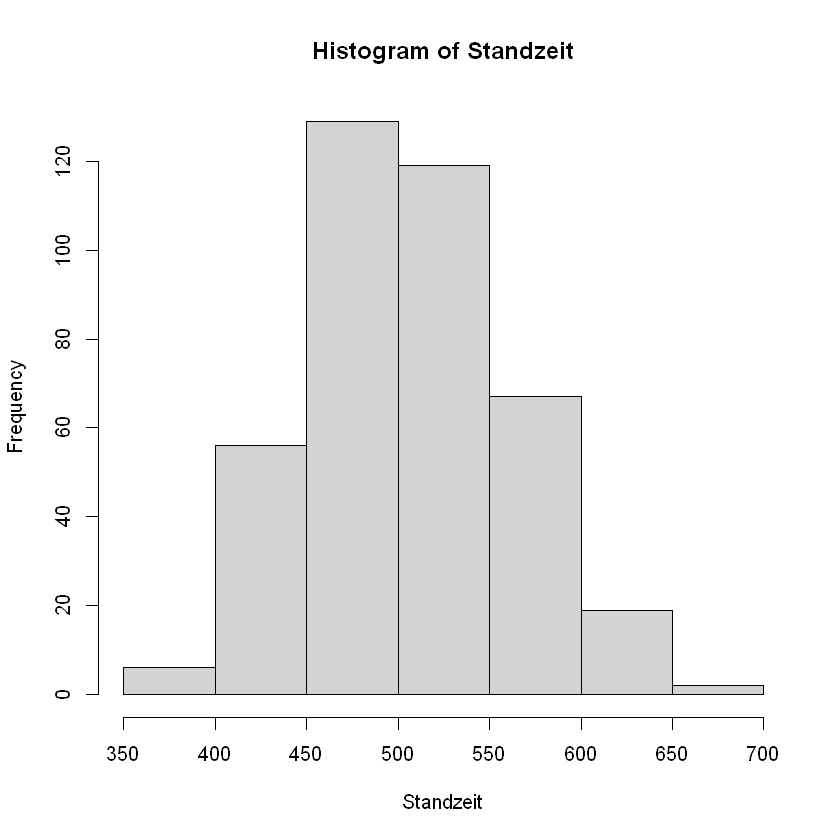

In [24]:
with(StackedData, hist(`Standzeit`))

Das Histogramm deutet auf eine Normalverteilung hin

[1] 244 218

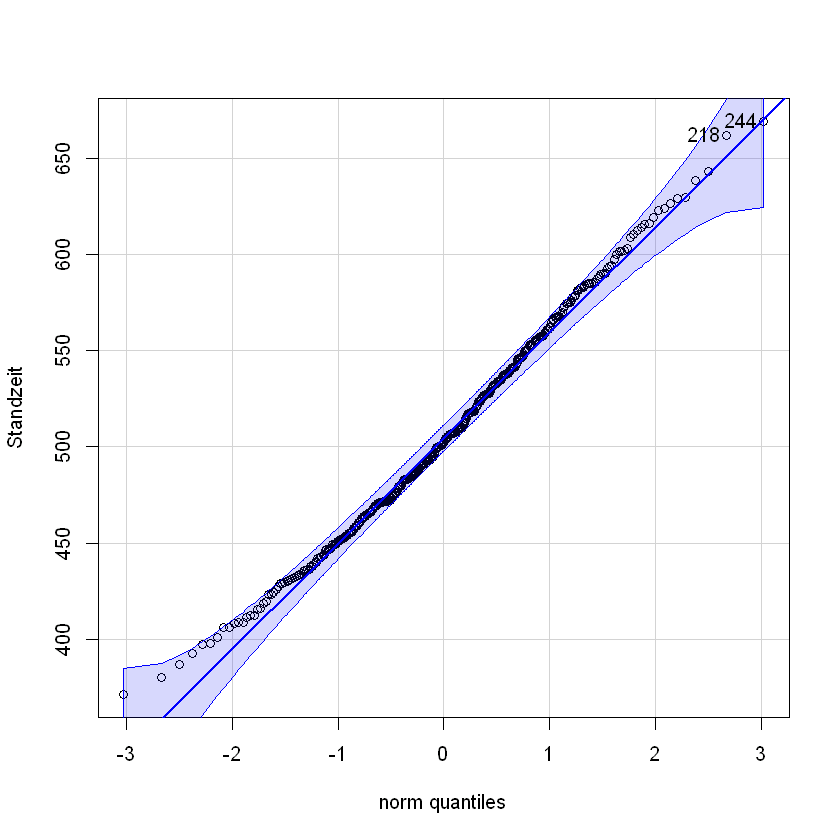

In [25]:
with(StackedData, qqPlot(`Standzeit`))

Das QQ-Plotauch. Und es zeigt keine potentiellen Ausreißer. Es scheint zwischen den vier Stichproben keinen großen Unterschied zu geben

[1] "218" "244"

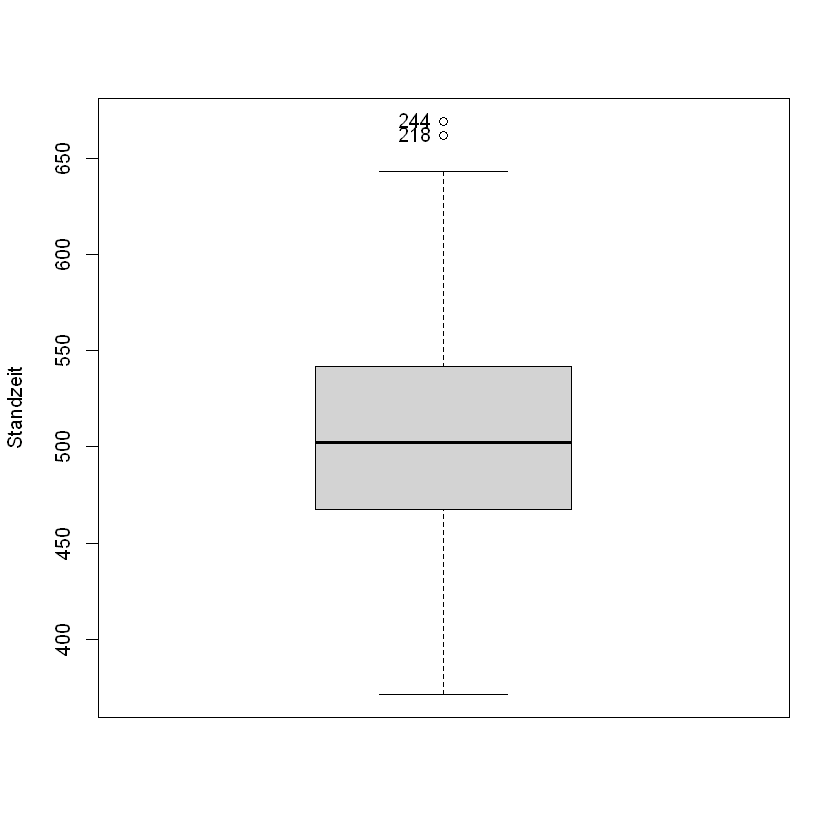

In [26]:
Boxplot(~Standzeit, data = StackedData, id = list(method = "y"))

Die Daten zeigen eine ziemlich konzentrierte zentrale Tendenz, wo die meisten 'Standzeit'-Werte zwischen 475 und 550 liegen.

Das Vorhandensein von Ausreißern deutet darauf hin, dass möglicherweise externe Faktoren oder Anomalien bestimmte Beobachtungen beeinflussen.

Der Bereich der 'Standzeit'-Werte (von etwa 400 bis 600) zeigt eine Variabilität innerhalb des Datensatzes, aber die Mehrheit fällt in einen vorhersehbaren Bereich (innerhalb der Whisker).

**Deskriptive Statistik - Einzeldaten**

In [27]:
# Calculate summary statistics (mean, standard deviation, and count)
summary_stats <- data.frame(
  Variante = c("Variante 1", "Variante 2", "Variante 3", "Variante 4"),
  Mean = sapply(Dataset_Standzeit[, c("Variante 1", "Variante 2", "Variante 3", "Variante 4")], mean, na.rm = TRUE),
  SD = sapply(Dataset_Standzeit[, c("Variante 1", "Variante 2", "Variante 3", "Variante 4")], sd, na.rm = TRUE),
  N = sapply(Dataset_Standzeit[, c("Variante 1", "Variante 2", "Variante 3", "Variante 4")], function(x) sum(!is.na(x)))
)

# Remove redundant repetitions
rownames(summary_stats) <- NULL

# Print the table
print(summary_stats, row.names=FALSE)

   Variante     Mean       SD   N
 Variante 1 500.5636 50.68195 100
 Variante 2 483.7909 42.60814 100
 Variante 3 523.3722 60.01562 100
 Variante 4 515.8434 55.61812  98


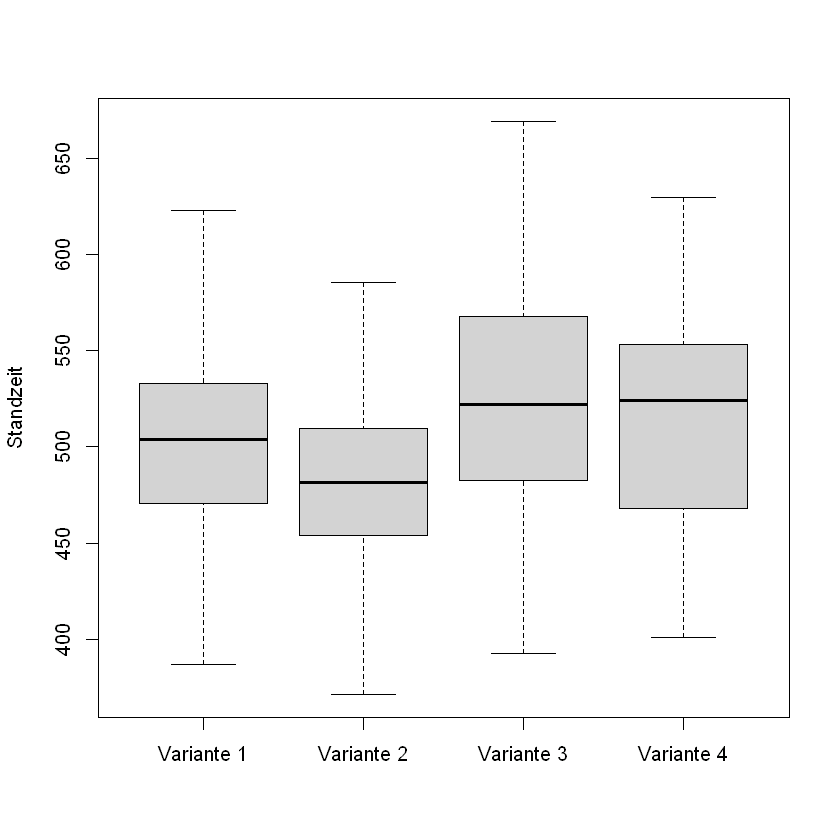

In [28]:
Boxplot(~`Variante 1`+`Variante 2`+`Variante 3`+`Variante 4`, data = Dataset_Standzeit, id = list(method = "y"), ylab = "Standzeit")

*Variante 3 scheint basierend auf dem Median und der Variabilität die langlebigste Option zu sein. Variante 4 schneidet gut ab, ist jedoch etwas weniger konsistent. Variante 1 und Variante 2 weisen niedrigere Medianwerte und eine höhere Variabilität auf, was sie weniger geeignet für Anwendungen macht, die eine konsistente und hohe Standzeit erfordern*

QQ-Plot

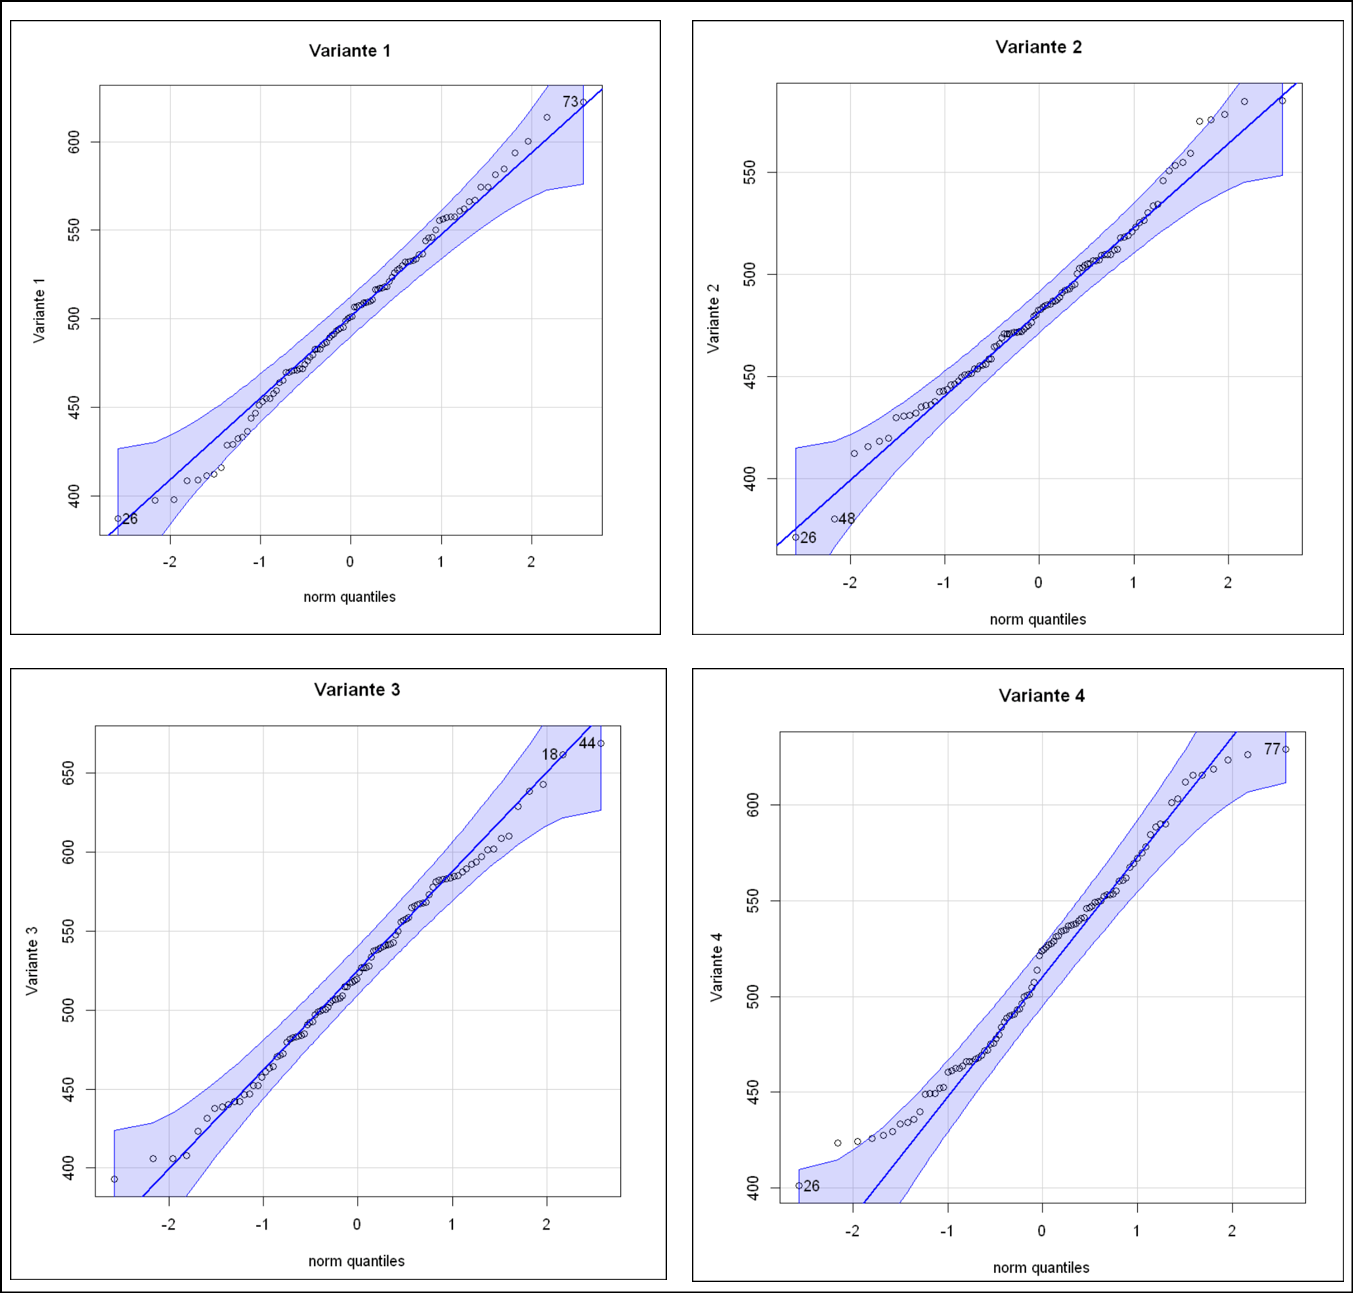

In [29]:
options(repr.plot.width = 1, repr.plot.height = 0.5)
display_png(file = QQ_Plot)

Die vier QQ-Plots deuten auf eine Normalverteilung hin, allerdings zeigen sie alle einen unregelmäßigen Verlauf, insbesondere Variante 4

**Shapiro-Wilk Test (p-Values)**

In [30]:
shapiro_p_values <- sapply(Dataset_Standzeit[, c("Variante 1", "Variante 2", "Variante 3", "Variante 4")], function(x) shapiro.test(x)$p.value)
shapiro_p_values_df <- data.frame(Variante = names(shapiro_p_values), P_Value = shapiro_p_values)
print(shapiro_p_values_df, row.names = FALSE)

   Variante    P_Value
 Variante 1 0.88470039
 Variante 2 0.35177595
 Variante 3 0.78032181
 Variante 4 0.06450832


Alle Stichproben deuten auf eine Normalverteilung hin.

**Prüfung auf Varianzhomogenität für Variante 1, Variante 2 und Variante 3**

*Da alle Stichproben normalverteilt sind, können wir den Bartlett Test anwenden. Wir Stapeln erstmal die Daten:*

In [31]:
Selected_Data <- Dataset_Standzeit[, c("Variante 1", "Variante 2", "Variante 3")]

Stacked_Data_Variante_1_2_3 <- gather(Selected_Data, key = "Variante", value = "Standzeit")

print(Stacked_Data_Variante_1_2_3)      # 290 Zeilen insgesamt
#head(Stacked_Data_Variante_1_2_3,7)

# A tibble: 300 × 2
   Variante   Standzeit
   <chr>          <dbl>
 1 Variante 1      490.
 2 Variante 1      397.
 3 Variante 1      411.
 4 Variante 1      495.
 5 Variante 1      436.
 6 Variante 1      493 
 7 Variante 1      476.
 8 Variante 1      530.
 9 Variante 1      511.
10 Variante 1      517.
# ℹ 290 more rows


In [32]:
bartlett_test <- bartlett.test(Standzeit ~ Variante, data = Stacked_Data_Variante_1_2_3)
print(bartlett_test)


	Bartlett test of homogeneity of variances

data:  Standzeit by Variante
Bartlett's K-squared = 11.438, df = 2, p-value = 0.003283



*p < 0.05 --> Wir werfen die Nullhypothese ab --> die Stichproben haben nicht gleiche Varianz*

**Anova mit Welch-Korrektur**

In [33]:
welch_anova <- oneway.test(Standzeit ~ Variante, data = Stacked_Data_Variante_1_2_3, var.equal = FALSE)
print(welch_anova)


	One-way analysis of means (not assuming equal variances)

data:  Standzeit and Variante
F = 14.573, num df = 2.00, denom df = 194.29, p-value = 1.268e-06



*p<0.05 --> wir können die Nullhypothese ablehnen --> mindestens zwei Mittelwerte unterscheiden sich signifikant voneinander*

*Aber welcher Mittelwert ist der größte?*

**Games-Howell post-hoc Analyse**

In [34]:
games_howell_result <- games_howell_test(Stacked_Data_Variante_1_2_3, Standzeit ~ Variante)
# View the results
games_howell_result

,.y.,group1,group2,estimate,conf.low,conf.high,p.adj,p.adj.signif
,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
1,Standzeit,Variante 1,Variante 2,-16.7727,-32.41214,-1.13326,3.2e-02,*
2,Standzeit,Variante 1,Variante 3,22.8086,4.25463,41.36257,1.1e-02,*
3,Standzeit,Variante 2,Variante 3,39.5813,22.18593,56.97667,7.0e-07,****


*Alle p-Values sind <0.05: wir können die Nullhypothese ablehnen, es gibt einen signifikanten Unterschied zwischen den Mittelwerten der Standzeit 1, Standzeit 2 und Standzeit 3.*<br> 
*"Variante 3" hat den höchsten Mittelwert an Standzeit.*

*Wir werden jetzt "Variante 3" gegen "Variante 4" überprüfen. Da die zwei Stichproben nicht abhängig sind, werde ich einen t-Test für zwei unabhängige Stichproben durchführen:*

H₀: x̄ ≤ ȳ --> Der Mittelwert von Variante 3 ist kleiner oder gleich wie der Mittelwert von Variante 4

H₁: x̄ > ȳ --> Der Mittelwert von Variante 3 ist größer als der Mittelwert von Variante 4

In [35]:
t.test(Dataset_Standzeit$`Variante 3`,Dataset_Standzeit$`Variante 4`, alternative='greater', conf.level=.95, var.equal=TRUE)


	Two Sample t-test

data:  Dataset_Standzeit$`Variante 3` and Dataset_Standzeit$`Variante 4`
t = 0.91511, df = 196, p-value = 0.1806
alternative hypothesis: true difference in means is greater than 0
95 percent confidence interval:
 -6.068102       Inf
sample estimates:
mean of x mean of y 
 523.3722  515.8434 


*p > 0.05 --> Nullhypothese --> Wir können nicht belegen, dass Variante 3 eine größere durchschnittliche Standzeit als Variante 4 hat*

**Welche Variante stellt die beste (längste) Standzeit dar?**

*Antwort: "Variante 3" hat eine signifikante größere durchsnittliche Standzeit im Vergleich zu "Variante 1" und "Variante 2", aber wir haben nicht genug Beleg, um sagen zu können, dass ihre durchsnittliche Standzeit auch signifikant größer als die durchsnittliche Standzeit von "Variante 1" ist. Daher sind beide "Variante 1" und "Variante 3" gleich gut anwendbar im Unterhnehmen.*

## 5. Übung "Prozessvereinfachung"

In einem Prozessschritt werden einzelne Bauteile des Produktes verklebt. Allgemein besteht die Ansicht „Viel hilft viel!“. Deshalb hat man mehrere Faktoren des Prozesses auf ein hohe und damit kostspielige Faktorstufe eingestellt. Nun kommen Zweifel auf, ob tatsächlich alle Faktoren im Prozess wichtig sind. Die vorliegenden Daten müssen nun auf die Wirksamkeit der einzelnen Faktoren im Klebeprozess untersucht und bewertet werden.

In [36]:
Dataset_Prozessvereinfachung$variable <- with(Dataset_Prozessvereinfachung, paste(Dauer, Feuchte, Temperatur))
Dataset_Prozessvereinfachung <- within (Dataset_Prozessvereinfachung, variable <- as.factor(variable))
head(Dataset_Prozessvereinfachung,5)

Dauer,Feuchte,Temperatur,Qualität,variable
<chr>,<chr>,<chr>,<dbl>,<fct>
Hoch,Hoch,Hoch,84.83,Hoch Hoch Hoch
Tief,Hoch,Tief,71.62,Tief Hoch Tief
Hoch,Tief,Hoch,86.51,Hoch Tief Hoch
Hoch,Hoch,Hoch,74.10,Hoch Hoch Hoch
Hoch,Tief,Tief,84.12,Hoch Tief Tief


**Deskriptive Statistik**

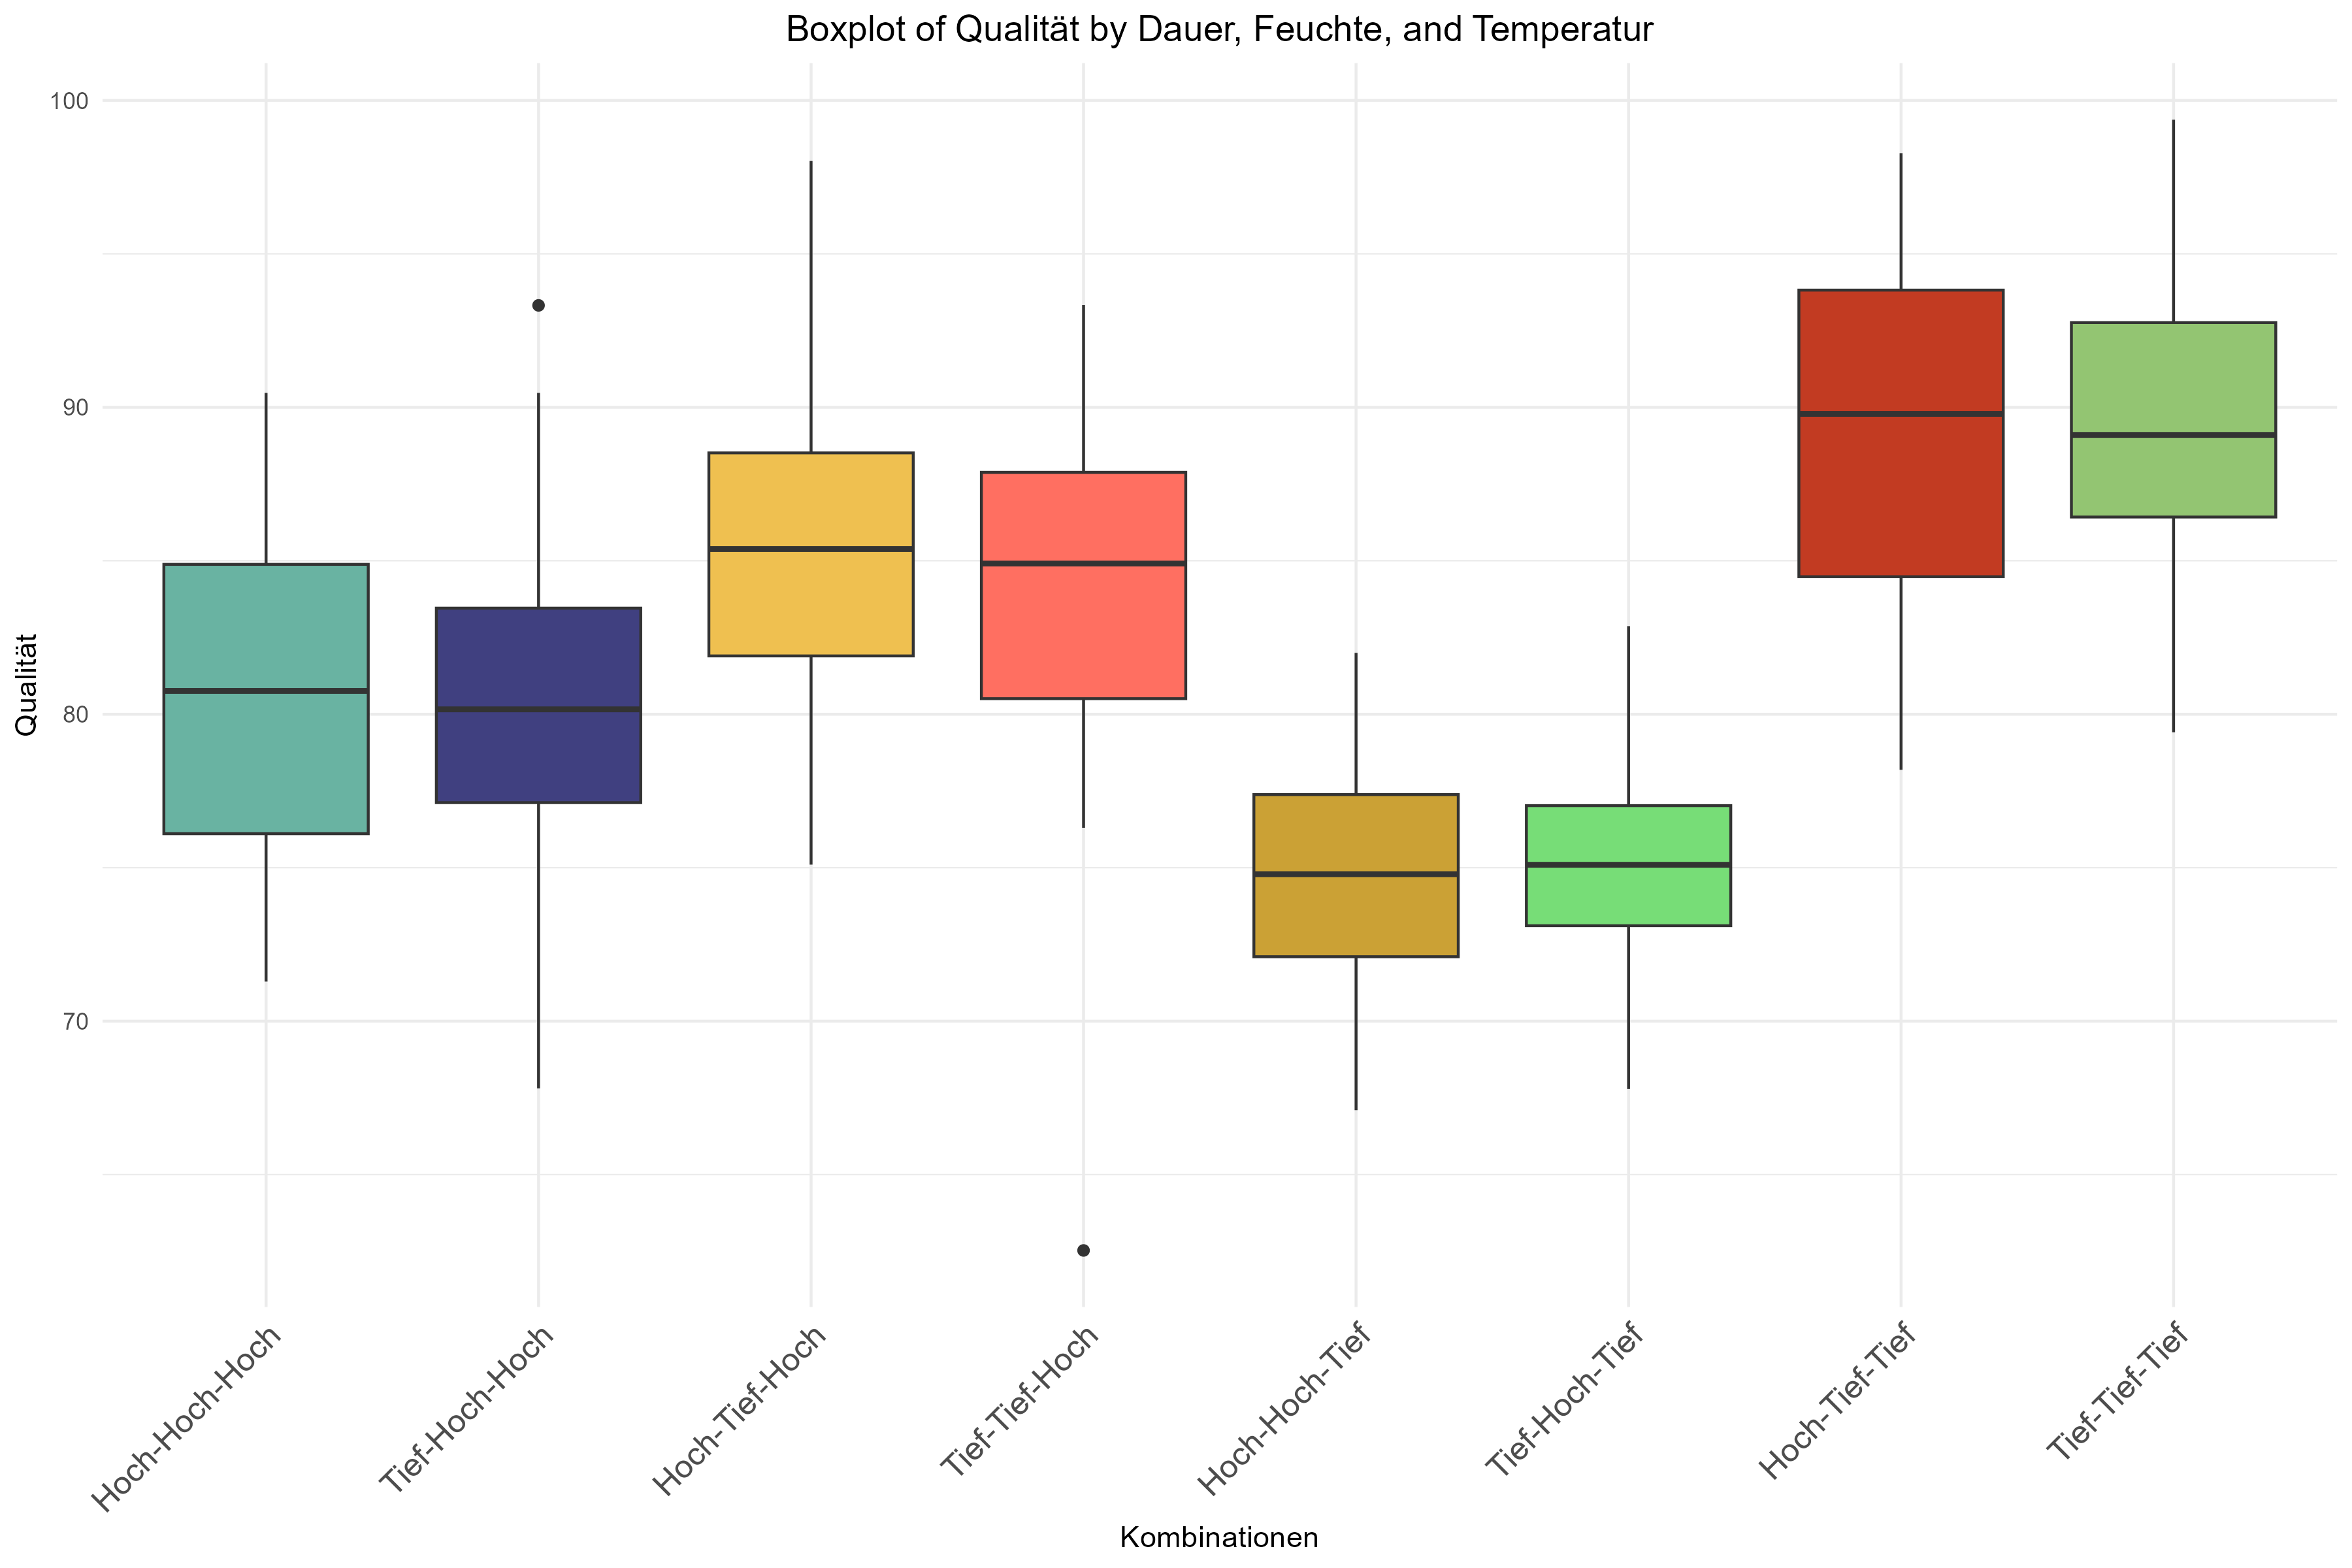

In [37]:
display_png(file = boxplot)

*Von einem ersten Blick können wir sagen, dass die "Dauer,Feuchte und Temperatur" Kombination von "Hoch-Tief-Tief" die beste Qualität liefert. Außerdem zeigen Boxplot 2 und Boxplot 4 einen potenziellen Ausreißer jeweils*

Um die Wirksamkeit der Faktoren zu prüfen, können wir eine mehrfaktorielle Varianzanalyse durchführen. Davor müssen wir sicherstellen, dass wir die vier Voraussetzungen erfüllen: <br>
1. Mindestens intervallskalierte abhängige Variable<br>
2. Merkmalsausprägungen müssen unabhängig voneinander sein (falls nicht: ANOVA mit Messwiederholung…)<br>
3. Normalverteilung der abhängigen Variable innerhalb der einzelnen Gruppen (für den Gesamtdatensatz ist dies nicht erforderlich)<br>
4. Gleiche Varianz aller Gruppen

**1. Mindestens intervallskalierte abhängige Variable**<br>
Unsere Variable "Qualität" ist intervallskaliert

**2. Unabhängigkeit der Merkmalausprägungen**

*In der Aufgabe gibt es keinen Hinweis auf Abhängigkeit zwischen den drei Stichproben "Dauer", "Feuchte" und "Temperatur", daher gehen wir von Unabhängigkeit ausgehen*

**3. Normalverteilung der abhängigen Variable innerhalb der einzelnen Gruppen**

In [38]:
normalityTest(Qualität~variable, test="shapiro.test", data=Dataset_Prozessvereinfachung)


 --------
 variable = Hoch Hoch Hoch 

	Shapiro-Wilk normality test

data:  Qualität
W = 0.96636, p-value = 0.445

 --------
 variable = Hoch Hoch Tief 

	Shapiro-Wilk normality test

data:  Qualität
W = 0.97837, p-value = 0.7807

 --------
 variable = Hoch Tief Hoch 

	Shapiro-Wilk normality test

data:  Qualität
W = 0.97135, p-value = 0.5766

 --------
 variable = Hoch Tief Tief 

	Shapiro-Wilk normality test

data:  Qualität
W = 0.96113, p-value = 0.3309

 --------
 variable = Tief Hoch Hoch 

	Shapiro-Wilk normality test

data:  Qualität
W = 0.99162, p-value = 0.9969

 --------
 variable = Tief Hoch Tief 

	Shapiro-Wilk normality test

data:  Qualität
W = 0.98383, p-value = 0.9156

 --------
 variable = Tief Tief Hoch 

	Shapiro-Wilk normality test

data:  Qualität
W = 0.88773, p-value = 0.004264

 --------
 variable = Tief Tief Tief 

	Shapiro-Wilk normality test

data:  Qualität
W = 0.9856, p-value = 0.9469

 --------

 p-values adjusted by the Holm method:
               unadju

*Nicht alle p-Werte gehen über dem Signifikanzniveau 0.05 --> Die abhängige Variable "Qualität" ist nicht für alle Kombinationen normalverteilt*

*Da Voraussetzung 3 nicht erfüllt ist, werde ich ein nonparametrisches Testverfahren anwenden*<br>
*Eine mehrfaktorielle ANOVA kann bei Nichterfüllung der Voraussetzungen durch den nicht-parametrischen **ScheirerRay-Hare-Test** ersetzt werden*

**ScheirerRay-Hare-Test**

**Feuchte und Dauer**

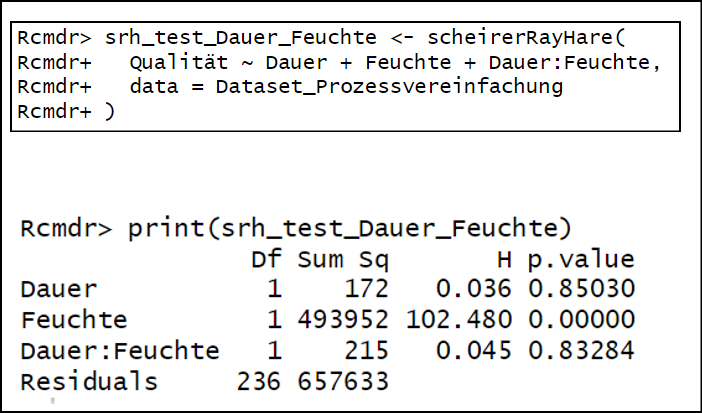

In [39]:
display_png(file = Dauer_Feuchte)

*Der Faktor "Feuchte" hat einen signifikanten Einfluss auf Qualität. Der Faktor "Dauer" hat keinen signifikanten Einfluss auf Qualität, weder als einzelner Faktor noch in Kombination mit "Feuchte"*

**Dauer und Temperatur**

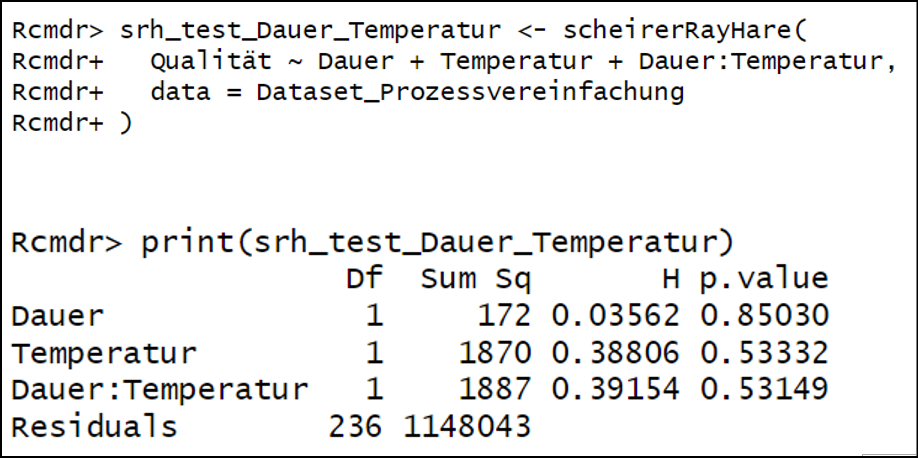

In [40]:
display_png(file = Dauer_Temperatur)

*Die Faktoren "Dauer" und "Temperatur" haben keinen signifikanten Einfluss auf "Qualität", weder als einzelne Faktoren noch in Kombination*

**Feuchte und Temperatur**

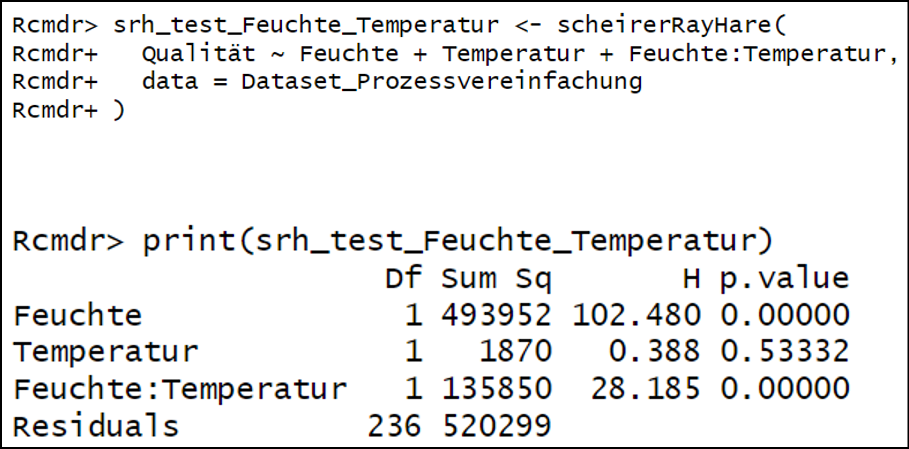

In [41]:
display_png(file = Feuchte_Temperatur)

*Wir haben schon oben gesehen, dass der Faktor "Feuchte" einen signifikanten Einfluss auf Qualität hat; dieses Mal hat die Kombination von Feuchte und Temperatur auch einen Einfluss auf "Qualität". "Temperatur" alleine hat keinen signifikanten Einfluss auf "Qualität".*

*Soweit sind die signifikanten Einflusse auf Qualität die folgenden:<br>*
*- "Feuchte"<br>*
*- "Feuchte" in Kombination mit "Temperatur" <br>*
*- "Dauer" hat keinen Signifikanten Einfluss auf "Qualität", weder als einzelner Faktor noch in Zusammenhang mit einem der anderen Faktoren.*

*Und welche Wirkung haben die drei Faktoren zusammen?*<br>
**Permanova (nichtparametrische Alternative für die mehrfaktorielle Analyse)** 

In [42]:
distance_matrix <- dist(Dataset_Prozessvereinfachung$Qualität)
Permanova_Drei_Zusammen = adonis2(distance_matrix ~ variable, data = Dataset_Prozessvereinfachung)

In [43]:
print(Permanova_Drei_Zusammen)

Permutation test for adonis under reduced model
Permutation: free
Number of permutations: 999

adonis2(formula = distance_matrix ~ variable, data = Dataset_Prozessvereinfachung)
          Df SumOfSqs      R2      F Pr(>F)    
Model      7   6995.6 0.52653 36.858  0.001 ***
Residual 232   6290.5 0.47347                  
Total    239  13286.1 1.00000                  
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1


*Der p-Wert ist hochsignifikant: die drei Faktoren kombiniert haben einen signifikanten Einfluss auf Qualität.*

**Sind alle Faktoren im Prozess wichtig?**

*Antwort: wir können davon ausgehen, dass nicht alle Faktoren im Prozess wichtig sind: die wichtigen Faktoren sind "Feuchte" und "Feuchte" in Kombination mit "Temperatur". Jedoch haben die drei Faktoren **kombiniert** ebenfalls einen signifikanten Einfluss auf Qualität des Produktes.*